In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Activation,Dense,Dropout
%matplotlib inline

In [69]:
df = pd.read_csv('monthly-milk-production.csv',index_col='Month')
df.index = pd.to_datetime(df.index)
df

,Milk Production
Month,
1962-01-01 01:00:00,589.0
1962-02-01 01:00:00,561.0
1962-03-01 01:00:00,640.0
1962-04-01 01:00:00,656.0
1962-05-01 01:00:00,727.0
...,...
1975-08-01 01:00:00,858.0
1975-09-01 01:00:00,817.0
1975-10-01 01:00:00,827.0


<Axes: xlabel='Month'>

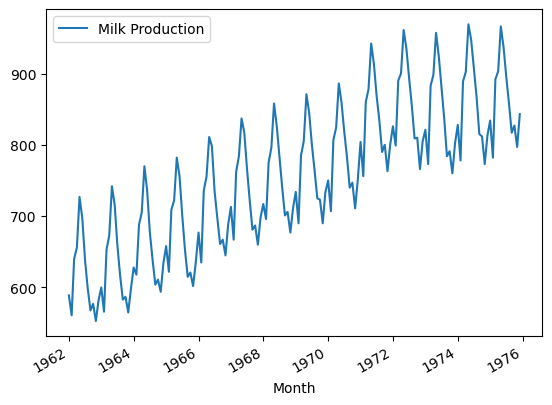

In [70]:
df.plot()

In [71]:
scaler = MinMaxScaler()

array = []
train_data = []
train_labels = []

In [74]:
for i in range(len(df)):
    array.append(df.iloc[i]['Milk Production'])

In [75]:
array = np.array(array).reshape(-1,1)
array = scaler.fit_transform(array)
array

array([[0.08653846],
       [0.01923077],
       [0.20913462],
       [0.24759615],
       [0.41826923],
       [0.34615385],
       [0.20913462],
       [0.11057692],
       [0.03605769],
       [0.05769231],
       [0.        ],
       [0.06971154],
       [0.11298077],
       [0.03125   ],
       [0.24038462],
       [0.28846154],
       [0.45432692],
       [0.39182692],
       [0.25721154],
       [0.15384615],
       [0.07211538],
       [0.08173077],
       [0.02884615],
       [0.10817308],
       [0.18028846],
       [0.15625   ],
       [0.32451923],
       [0.36538462],
       [0.52163462],
       [0.43990385],
       [0.30048077],
       [0.20673077],
       [0.12259615],
       [0.13942308],
       [0.09855769],
       [0.19471154],
       [0.25240385],
       [0.16586538],
       [0.375     ],
       [0.40625   ],
       [0.55048077],
       [0.48798077],
       [0.35817308],
       [0.24038462],
       [0.14903846],
       [0.16346154],
       [0.11778846],
       [0.197

In [76]:
k = 0
for i in range(len(array)):
    try:
        train_data.append(array[12*k:12*(k+1)])
        train_labels.append(array[12*(k+1)])
        k+=1
    except:
        break

In [78]:
train_data = np.squeeze(train_data)
train_data.shape

(14, 12)

In [80]:
train_labels = np.array(train_labels)
train_labels.shape

(13, 1)

In [81]:
train_data = train_data[:len(train_labels)]
train_data = np.expand_dims(train_data,1)
train_data.shape

(13, 1, 12)

In [82]:
train_data[1]

array([[0.11298077, 0.03125   , 0.24038462, 0.28846154, 0.45432692,
        0.39182692, 0.25721154, 0.15384615, 0.07211538, 0.08173077,
        0.02884615, 0.10817308]])

In [83]:
train_labels[1]

array([0.18028846])

In [85]:
model = Sequential()

model.add(LSTM(250,input_shape=(1,12)))

model.add(Dropout(0.5))
          
model.add(Dense(250,activation='relu'))
model.add(Dropout(0.5))
          
model.add(Dense(12,activation='relu'))
model.add(Dropout(0.5))
          
model.add(Dense(1,activation='relu'))

model.compile(loss='mean_squared_error',optimizer='adam')
          
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 250)               263000    
                                                                 
 dropout (Dropout)           (None, 250)               0         
                                                                 
 dense_2 (Dense)             (None, 250)               62750     
                                                                 
 dropout_1 (Dropout)         (None, 250)               0         
                                                                 
 dense_3 (Dense)             (None, 12)                3012      
                                                                 
 dropout_2 (Dropout)         (None, 12)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                

In [86]:
E = 1000

H = model.fit(train_data,train_labels,epochs=E)



Train on 13 samples
Epoch 1/1000
13/13 [==============================] - 0s 33ms/sample - loss: 0.2321
Epoch 2/1000
13/13 [==============================] - 0s 305us/sample - loss: 0.2321
Epoch 3/1000
13/13 [==============================] - 0s 307us/sample - loss: 0.2316
Epoch 4/1000
13/13 [==============================] - 0s 307us/sample - loss: 0.2308
Epoch 5/1000
13/13 [==============================] - 0s 230us/sample - loss: 0.2282
Epoch 6/1000
13/13 [==============================] - 0s 230us/sample - loss: 0.2267
Epoch 7/1000
13/13 [==============================] - 0s 230us/sample - loss: 0.2047
Epoch 8/1000
13/13 [==============================] - 0s 307us/sample - loss: 0.2107
Epoch 9/1000
13/13 [==============================] - 0s 230us/sample - loss: 0.2005
Epoch 10/1000
13/13 [==============================] - 0s 230us/sample - loss: 0.1744
Epoch 11/1000
13/13 [==============================] - 0s 230us/sample - loss: 0.1839
Epoch 12/1000
13/13 [=====================

13/13 [==============================] - 0s 307us/sample - loss: 0.0685
Epoch 91/1000
13/13 [==============================] - 0s 307us/sample - loss: 0.0573
Epoch 92/1000
13/13 [==============================] - 0s 230us/sample - loss: 0.0276
Epoch 93/1000
13/13 [==============================] - 0s 230us/sample - loss: 0.0798
Epoch 94/1000
13/13 [==============================] - 0s 154us/sample - loss: 0.0913
Epoch 95/1000
13/13 [==============================] - 0s 230us/sample - loss: 0.0521
Epoch 96/1000
13/13 [==============================] - 0s 230us/sample - loss: 0.0362
Epoch 97/1000
13/13 [==============================] - 0s 153us/sample - loss: 0.0737
Epoch 98/1000
13/13 [==============================] - 0s 154us/sample - loss: 0.0229
Epoch 99/1000
13/13 [==============================] - 0s 153us/sample - loss: 0.0364
Epoch 100/1000
13/13 [==============================] - 0s 307us/sample - loss: 0.0539
Epoch 101/1000
13/13 [==============================] - 0s 230us/sa

13/13 [==============================] - 0s 307us/sample - loss: 0.0290
Epoch 185/1000
13/13 [==============================] - 0s 230us/sample - loss: 0.0324
Epoch 186/1000
13/13 [==============================] - 0s 230us/sample - loss: 0.0515
Epoch 187/1000
13/13 [==============================] - 0s 230us/sample - loss: 0.0360
Epoch 188/1000
13/13 [==============================] - 0s 307us/sample - loss: 0.0290
Epoch 189/1000
13/13 [==============================] - 0s 230us/sample - loss: 0.0173
Epoch 190/1000
13/13 [==============================] - 0s 154us/sample - loss: 0.0355
Epoch 191/1000
13/13 [==============================] - 0s 230us/sample - loss: 0.0369
Epoch 192/1000
13/13 [==============================] - 0s 230us/sample - loss: 0.0355
Epoch 193/1000
13/13 [==============================] - 0s 230us/sample - loss: 0.0119
Epoch 194/1000
13/13 [==============================] - 0s 230us/sample - loss: 0.0214
Epoch 195/1000
13/13 [==============================] - 0s

13/13 [==============================] - 0s 307us/sample - loss: 0.0111
Epoch 279/1000
13/13 [==============================] - 0s 307us/sample - loss: 0.0415
Epoch 280/1000
13/13 [==============================] - 0s 230us/sample - loss: 0.0277
Epoch 281/1000
13/13 [==============================] - 0s 230us/sample - loss: 0.0355
Epoch 282/1000
13/13 [==============================] - 0s 230us/sample - loss: 0.0272
Epoch 283/1000
13/13 [==============================] - 0s 230us/sample - loss: 0.0332
Epoch 284/1000
13/13 [==============================] - 0s 384us/sample - loss: 0.0218
Epoch 285/1000
13/13 [==============================] - 0s 230us/sample - loss: 0.0232
Epoch 286/1000
13/13 [==============================] - 0s 307us/sample - loss: 0.0266
Epoch 287/1000
13/13 [==============================] - 0s 307us/sample - loss: 0.0330
Epoch 288/1000
13/13 [==============================] - 0s 307us/sample - loss: 0.0236
Epoch 289/1000
13/13 [==============================] - 0s

13/13 [==============================] - 0s 230us/sample - loss: 0.0167
Epoch 373/1000
13/13 [==============================] - 0s 230us/sample - loss: 0.0170
Epoch 374/1000
13/13 [==============================] - 0s 153us/sample - loss: 0.0279
Epoch 375/1000
13/13 [==============================] - 0s 153us/sample - loss: 0.0114
Epoch 376/1000
13/13 [==============================] - 0s 153us/sample - loss: 0.0157
Epoch 377/1000
13/13 [==============================] - 0s 307us/sample - loss: 0.0172
Epoch 378/1000
13/13 [==============================] - 0s 230us/sample - loss: 0.0233
Epoch 379/1000
13/13 [==============================] - 0s 154us/sample - loss: 0.0191
Epoch 380/1000
13/13 [==============================] - 0s 154us/sample - loss: 0.0130
Epoch 381/1000
13/13 [==============================] - 0s 153us/sample - loss: 0.0125
Epoch 382/1000
13/13 [==============================] - 0s 230us/sample - loss: 0.0240
Epoch 383/1000
13/13 [==============================] - 0s

13/13 [==============================] - 0s 384us/sample - loss: 0.0165
Epoch 467/1000
13/13 [==============================] - 0s 460us/sample - loss: 0.0188
Epoch 468/1000
13/13 [==============================] - 0s 309us/sample - loss: 0.0298
Epoch 469/1000
13/13 [==============================] - 0s 307us/sample - loss: 0.0185
Epoch 470/1000
13/13 [==============================] - 0s 460us/sample - loss: 0.0176
Epoch 471/1000
13/13 [==============================] - 0s 307us/sample - loss: 0.0204
Epoch 472/1000
13/13 [==============================] - 0s 307us/sample - loss: 0.0221
Epoch 473/1000
13/13 [==============================] - 0s 307us/sample - loss: 0.0148
Epoch 474/1000
13/13 [==============================] - 0s 230us/sample - loss: 0.0155
Epoch 475/1000
13/13 [==============================] - 0s 230us/sample - loss: 0.0131
Epoch 476/1000
13/13 [==============================] - 0s 230us/sample - loss: 0.0096
Epoch 477/1000
13/13 [==============================] - 0s

13/13 [==============================] - 0s 153us/sample - loss: 0.0373
Epoch 561/1000
13/13 [==============================] - 0s 230us/sample - loss: 0.0147
Epoch 562/1000
13/13 [==============================] - 0s 230us/sample - loss: 0.0182
Epoch 563/1000
13/13 [==============================] - 0s 230us/sample - loss: 0.0181
Epoch 564/1000
13/13 [==============================] - 0s 230us/sample - loss: 0.0088
Epoch 565/1000
13/13 [==============================] - 0s 230us/sample - loss: 0.0085
Epoch 566/1000
13/13 [==============================] - 0s 307us/sample - loss: 0.0094
Epoch 567/1000
13/13 [==============================] - 0s 307us/sample - loss: 0.0233
Epoch 568/1000
13/13 [==============================] - 0s 307us/sample - loss: 0.0115
Epoch 569/1000
13/13 [==============================] - 0s 230us/sample - loss: 0.0140
Epoch 570/1000
13/13 [==============================] - 0s 230us/sample - loss: 0.0081
Epoch 571/1000
13/13 [==============================] - 0s

13/13 [==============================] - 0s 154us/sample - loss: 0.0177
Epoch 655/1000
13/13 [==============================] - 0s 230us/sample - loss: 0.0106
Epoch 656/1000
13/13 [==============================] - 0s 307us/sample - loss: 0.0052
Epoch 657/1000
13/13 [==============================] - 0s 230us/sample - loss: 0.0154
Epoch 658/1000
13/13 [==============================] - 0s 230us/sample - loss: 0.0094
Epoch 659/1000
13/13 [==============================] - 0s 153us/sample - loss: 0.0083
Epoch 660/1000
13/13 [==============================] - 0s 153us/sample - loss: 0.0067
Epoch 661/1000
13/13 [==============================] - 0s 230us/sample - loss: 0.0070
Epoch 662/1000
13/13 [==============================] - 0s 230us/sample - loss: 0.0096
Epoch 663/1000
13/13 [==============================] - 0s 230us/sample - loss: 0.0070
Epoch 664/1000
13/13 [==============================] - 0s 153us/sample - loss: 0.0142
Epoch 665/1000
13/13 [==============================] - 0s

13/13 [==============================] - 0s 153us/sample - loss: 0.0045
Epoch 749/1000
13/13 [==============================] - 0s 230us/sample - loss: 0.0149
Epoch 750/1000
13/13 [==============================] - 0s 230us/sample - loss: 0.0098
Epoch 751/1000
13/13 [==============================] - 0s 230us/sample - loss: 0.0058
Epoch 752/1000
13/13 [==============================] - 0s 307us/sample - loss: 0.0084
Epoch 753/1000
13/13 [==============================] - 0s 230us/sample - loss: 0.0083
Epoch 754/1000
13/13 [==============================] - 0s 230us/sample - loss: 0.0116
Epoch 755/1000
13/13 [==============================] - 0s 230us/sample - loss: 0.0137
Epoch 756/1000
13/13 [==============================] - 0s 230us/sample - loss: 0.0067
Epoch 757/1000
13/13 [==============================] - 0s 307us/sample - loss: 0.0102
Epoch 758/1000
13/13 [==============================] - 0s 230us/sample - loss: 0.0095
Epoch 759/1000
13/13 [==============================] - 0s

13/13 [==============================] - 0s 153us/sample - loss: 0.0130
Epoch 843/1000
13/13 [==============================] - 0s 230us/sample - loss: 0.0089
Epoch 844/1000
13/13 [==============================] - 0s 230us/sample - loss: 0.0084
Epoch 845/1000
13/13 [==============================] - 0s 230us/sample - loss: 0.0085
Epoch 846/1000
13/13 [==============================] - 0s 230us/sample - loss: 0.0068
Epoch 847/1000
13/13 [==============================] - 0s 230us/sample - loss: 0.0055
Epoch 848/1000
13/13 [==============================] - 0s 230us/sample - loss: 0.0086
Epoch 849/1000
13/13 [==============================] - 0s 307us/sample - loss: 0.0064
Epoch 850/1000
13/13 [==============================] - 0s 230us/sample - loss: 0.0049
Epoch 851/1000
13/13 [==============================] - 0s 215us/sample - loss: 0.0066
Epoch 852/1000
13/13 [==============================] - 0s 230us/sample - loss: 0.0165
Epoch 853/1000
13/13 [==============================] - 0s

13/13 [==============================] - 0s 230us/sample - loss: 0.0056
Epoch 937/1000
13/13 [==============================] - 0s 230us/sample - loss: 0.0064
Epoch 938/1000
13/13 [==============================] - 0s 230us/sample - loss: 0.0057
Epoch 939/1000
13/13 [==============================] - 0s 307us/sample - loss: 0.0048
Epoch 940/1000
13/13 [==============================] - 0s 230us/sample - loss: 0.0047
Epoch 941/1000
13/13 [==============================] - 0s 230us/sample - loss: 0.0064
Epoch 942/1000
13/13 [==============================] - 0s 307us/sample - loss: 0.0077
Epoch 943/1000
13/13 [==============================] - 0s 230us/sample - loss: 0.0068
Epoch 944/1000
13/13 [==============================] - 0s 230us/sample - loss: 0.0066
Epoch 945/1000
13/13 [==============================] - 0s 307us/sample - loss: 0.0087
Epoch 946/1000
13/13 [==============================] - 0s 384us/sample - loss: 0.0124
Epoch 947/1000
13/13 [==============================] - 0s

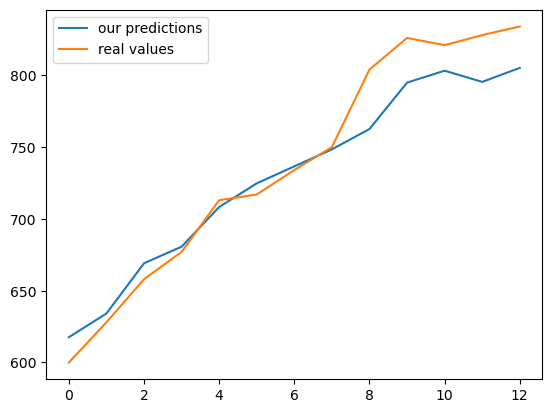

In [92]:
preds=scaler.inverse_transform(model.predict(train_data))
plt.plot(range(0,13),preds,label='our predictions')
plt.plot(range(0,13),scaler.inverse_transform(train_labels),label='real values')
plt.legend()

In [93]:
seed = array[-12:]
seed

array([[0.67548077],
       [0.55048077],
       [0.81490385],
       [0.84134615],
       [0.99278846],
       [0.92307692],
       [0.82451923],
       [0.73317308],
       [0.63461538],
       [0.65865385],
       [0.58653846],
       [0.69711538]])

In [94]:
seed.shape

(12, 1)

In [95]:
seed

array([[0.67548077],
       [0.55048077],
       [0.81490385],
       [0.84134615],
       [0.99278846],
       [0.92307692],
       [0.82451923],
       [0.73317308],
       [0.63461538],
       [0.65865385],
       [0.58653846],
       [0.69711538]])

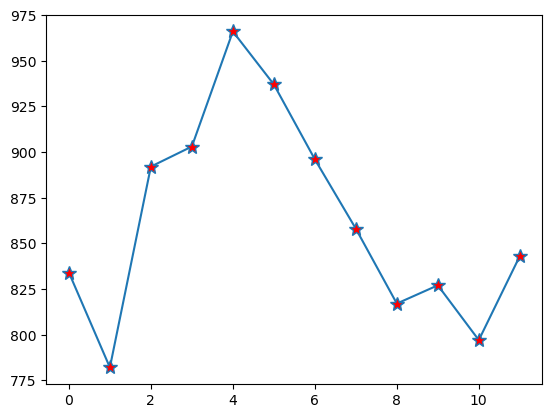

In [96]:
next_year_prediction = scaler.inverse_transform(seed[-12:].reshape(-1,1))
plt.plot(range(0,12),next_year_prediction,marker='*',markerfacecolor='red',markersize=10)
